<a href="https://colab.research.google.com/github/Vishnu-bhat/Traffic-Management-System-using-YOLO/blob/main/Custom_Train_Yolo_Model_(Indian_Vehicles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat May  3 11:32:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
print(model.names)

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.3MB/s]

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5SX7Sf4MOgA1yBPXD7Rn")
project = rf.workspace("thesis-8r5tt").project("indian_vehicle_detection")
version = project.version(6)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian_Vehicle_Detection-6 in yolov11:: 100%|██████████| 21106/21106 [00:03<00:00, 6058.56it/s]


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data=/content/Indian_Vehicle_Detection-6/data.yaml epochs=50 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.124 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Indian_Vehicle_Detection-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

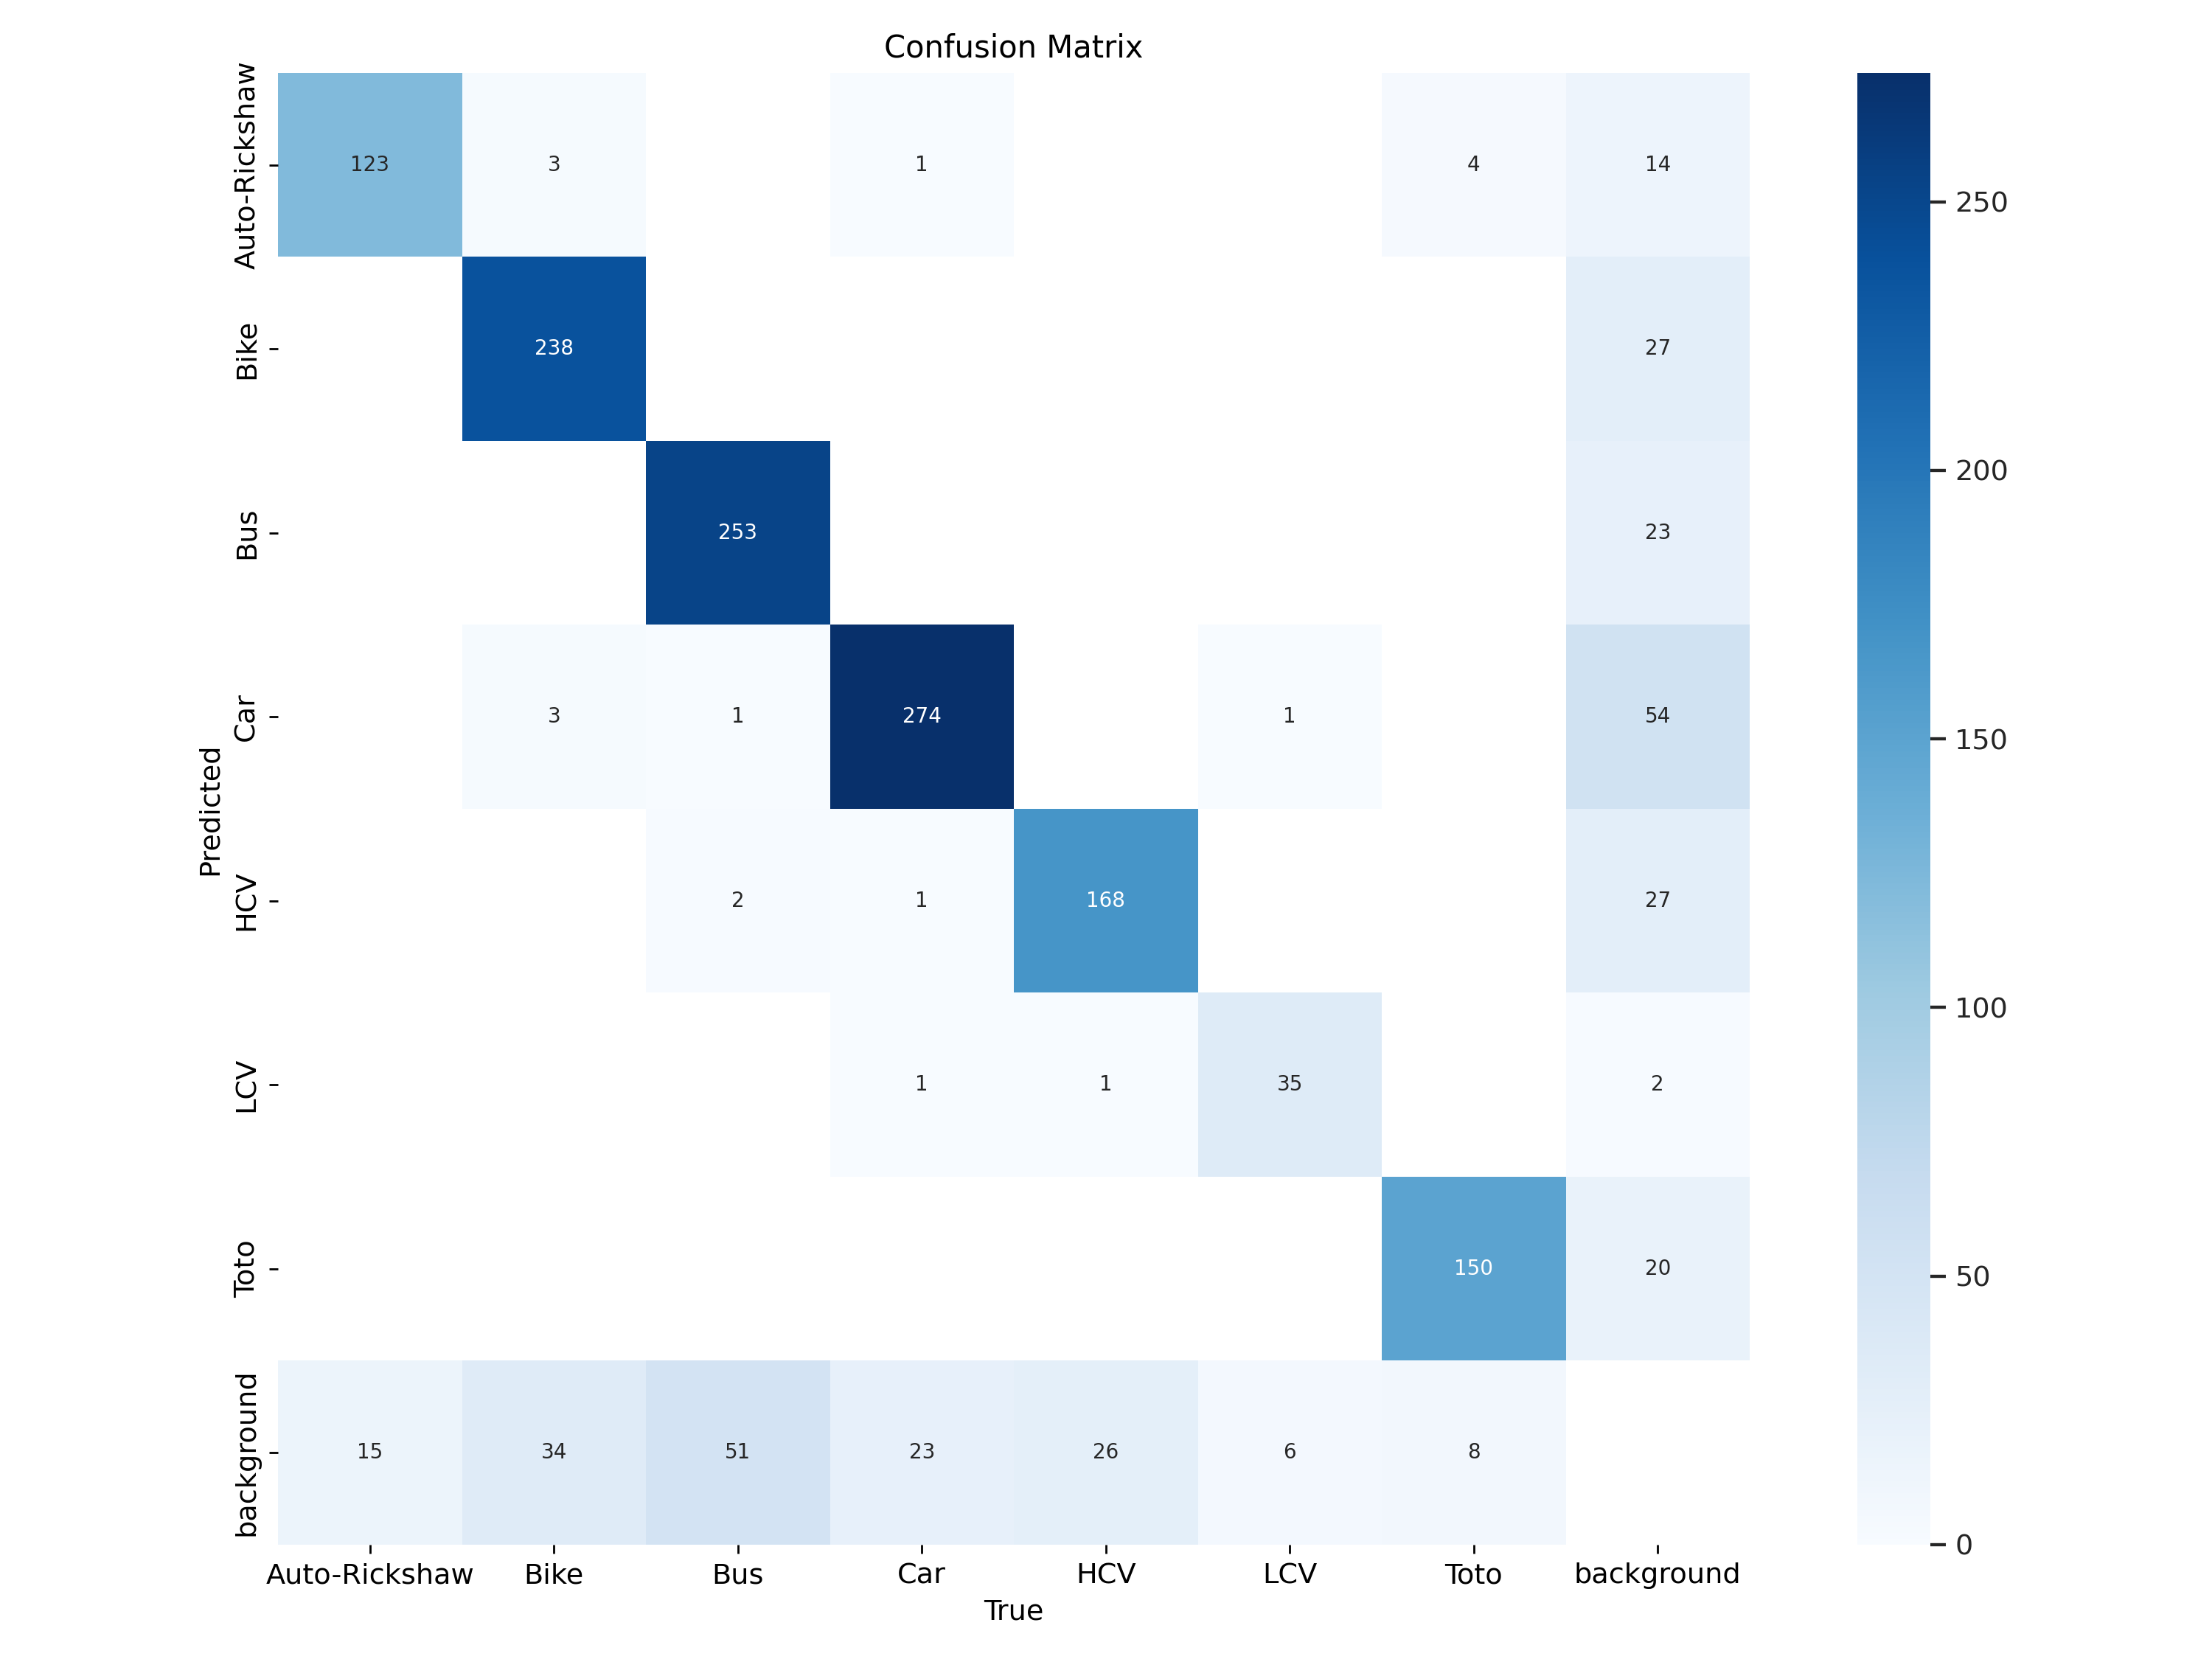

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

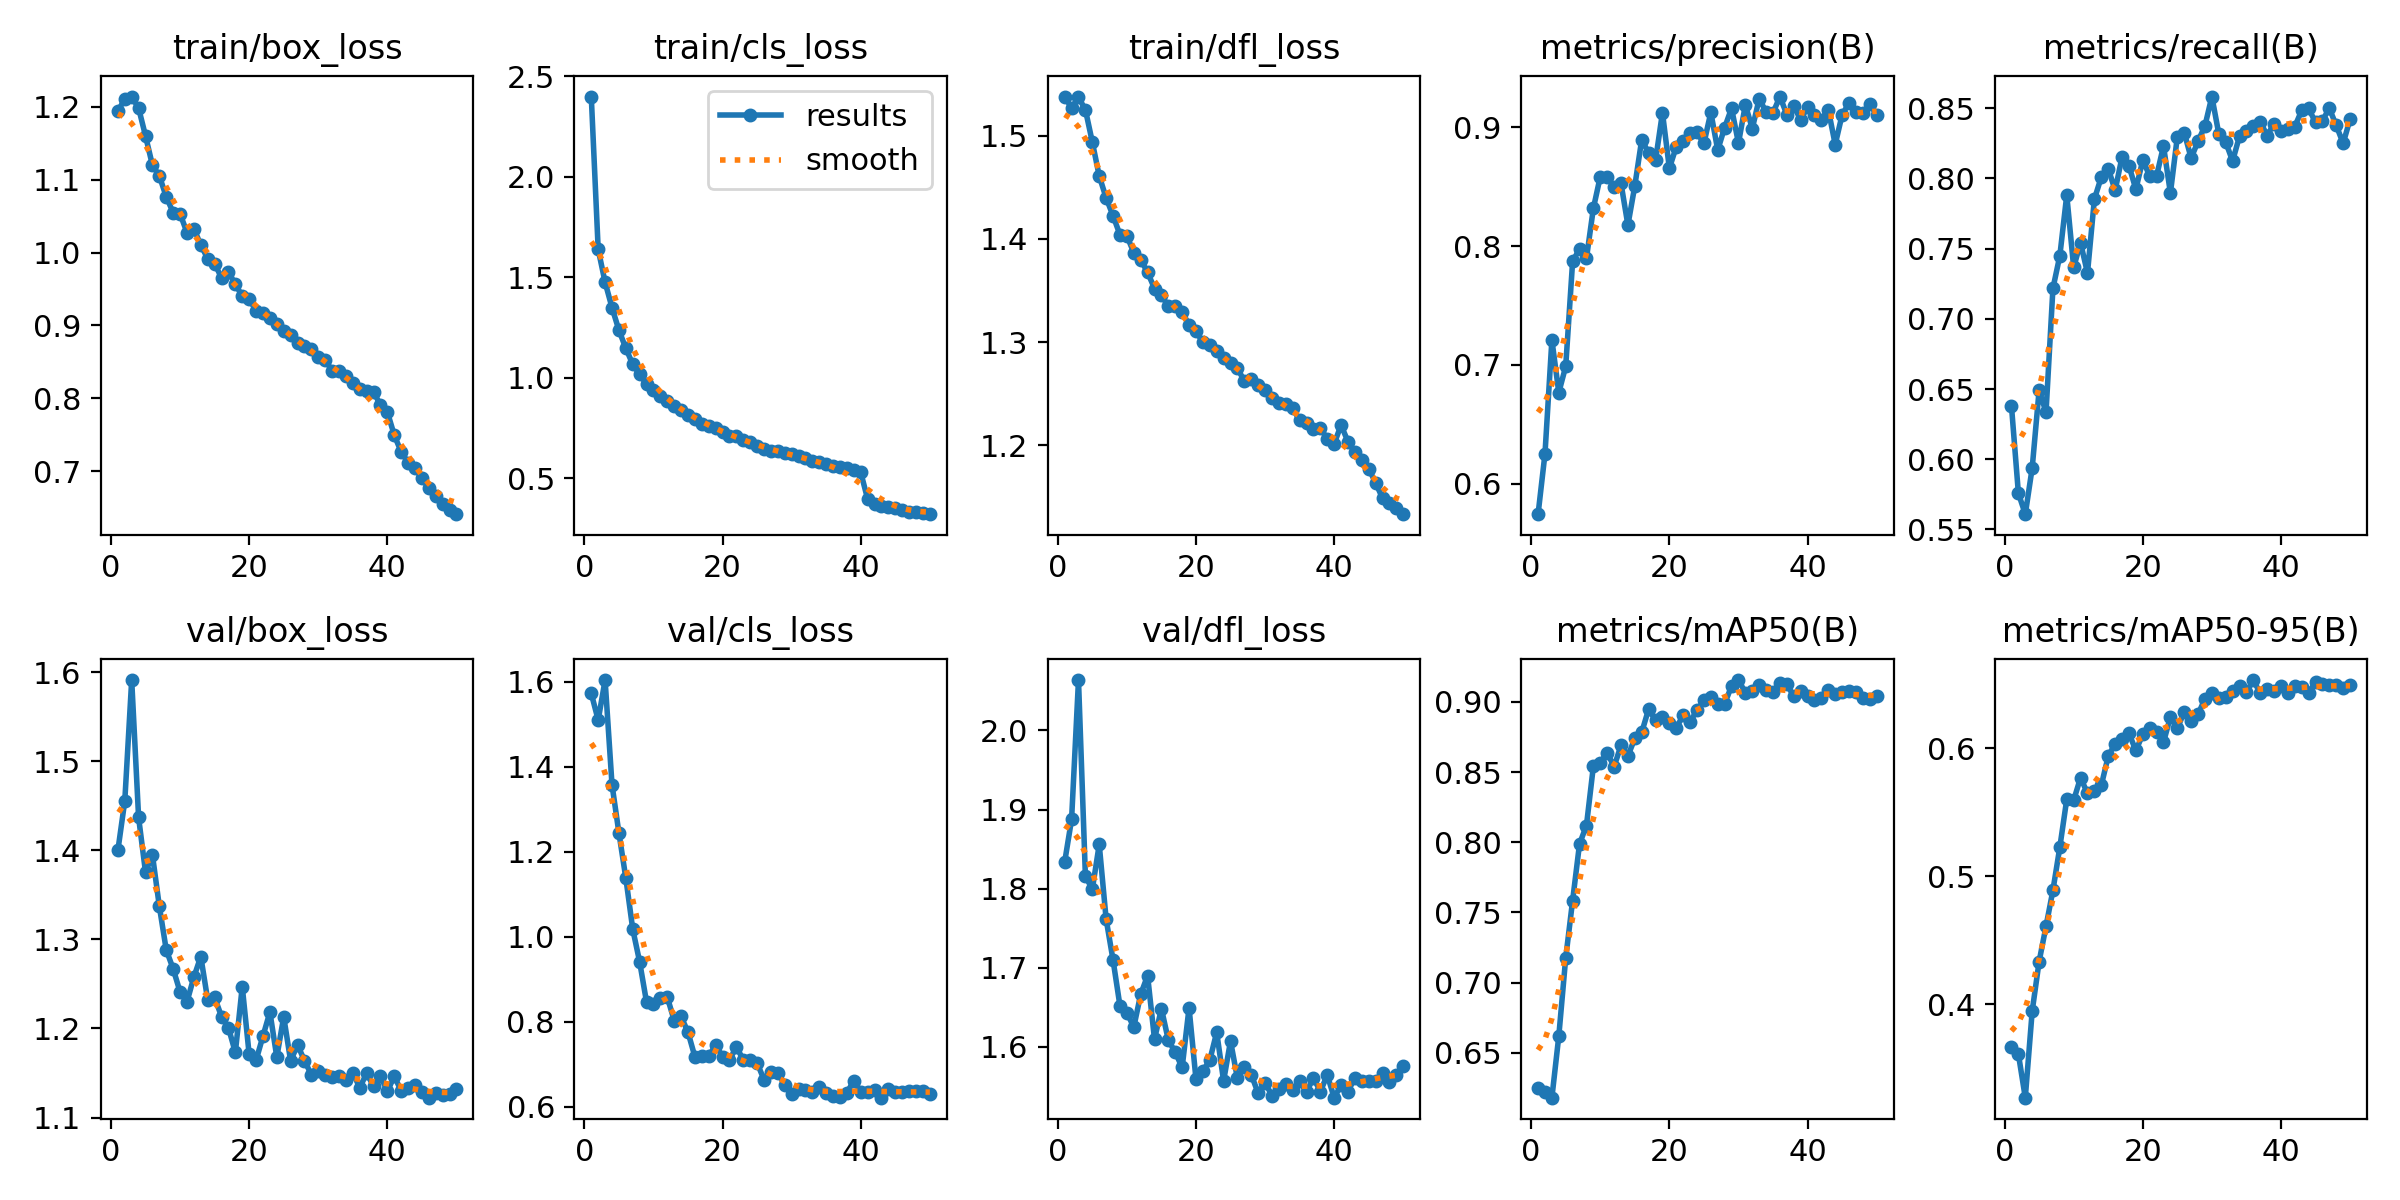

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

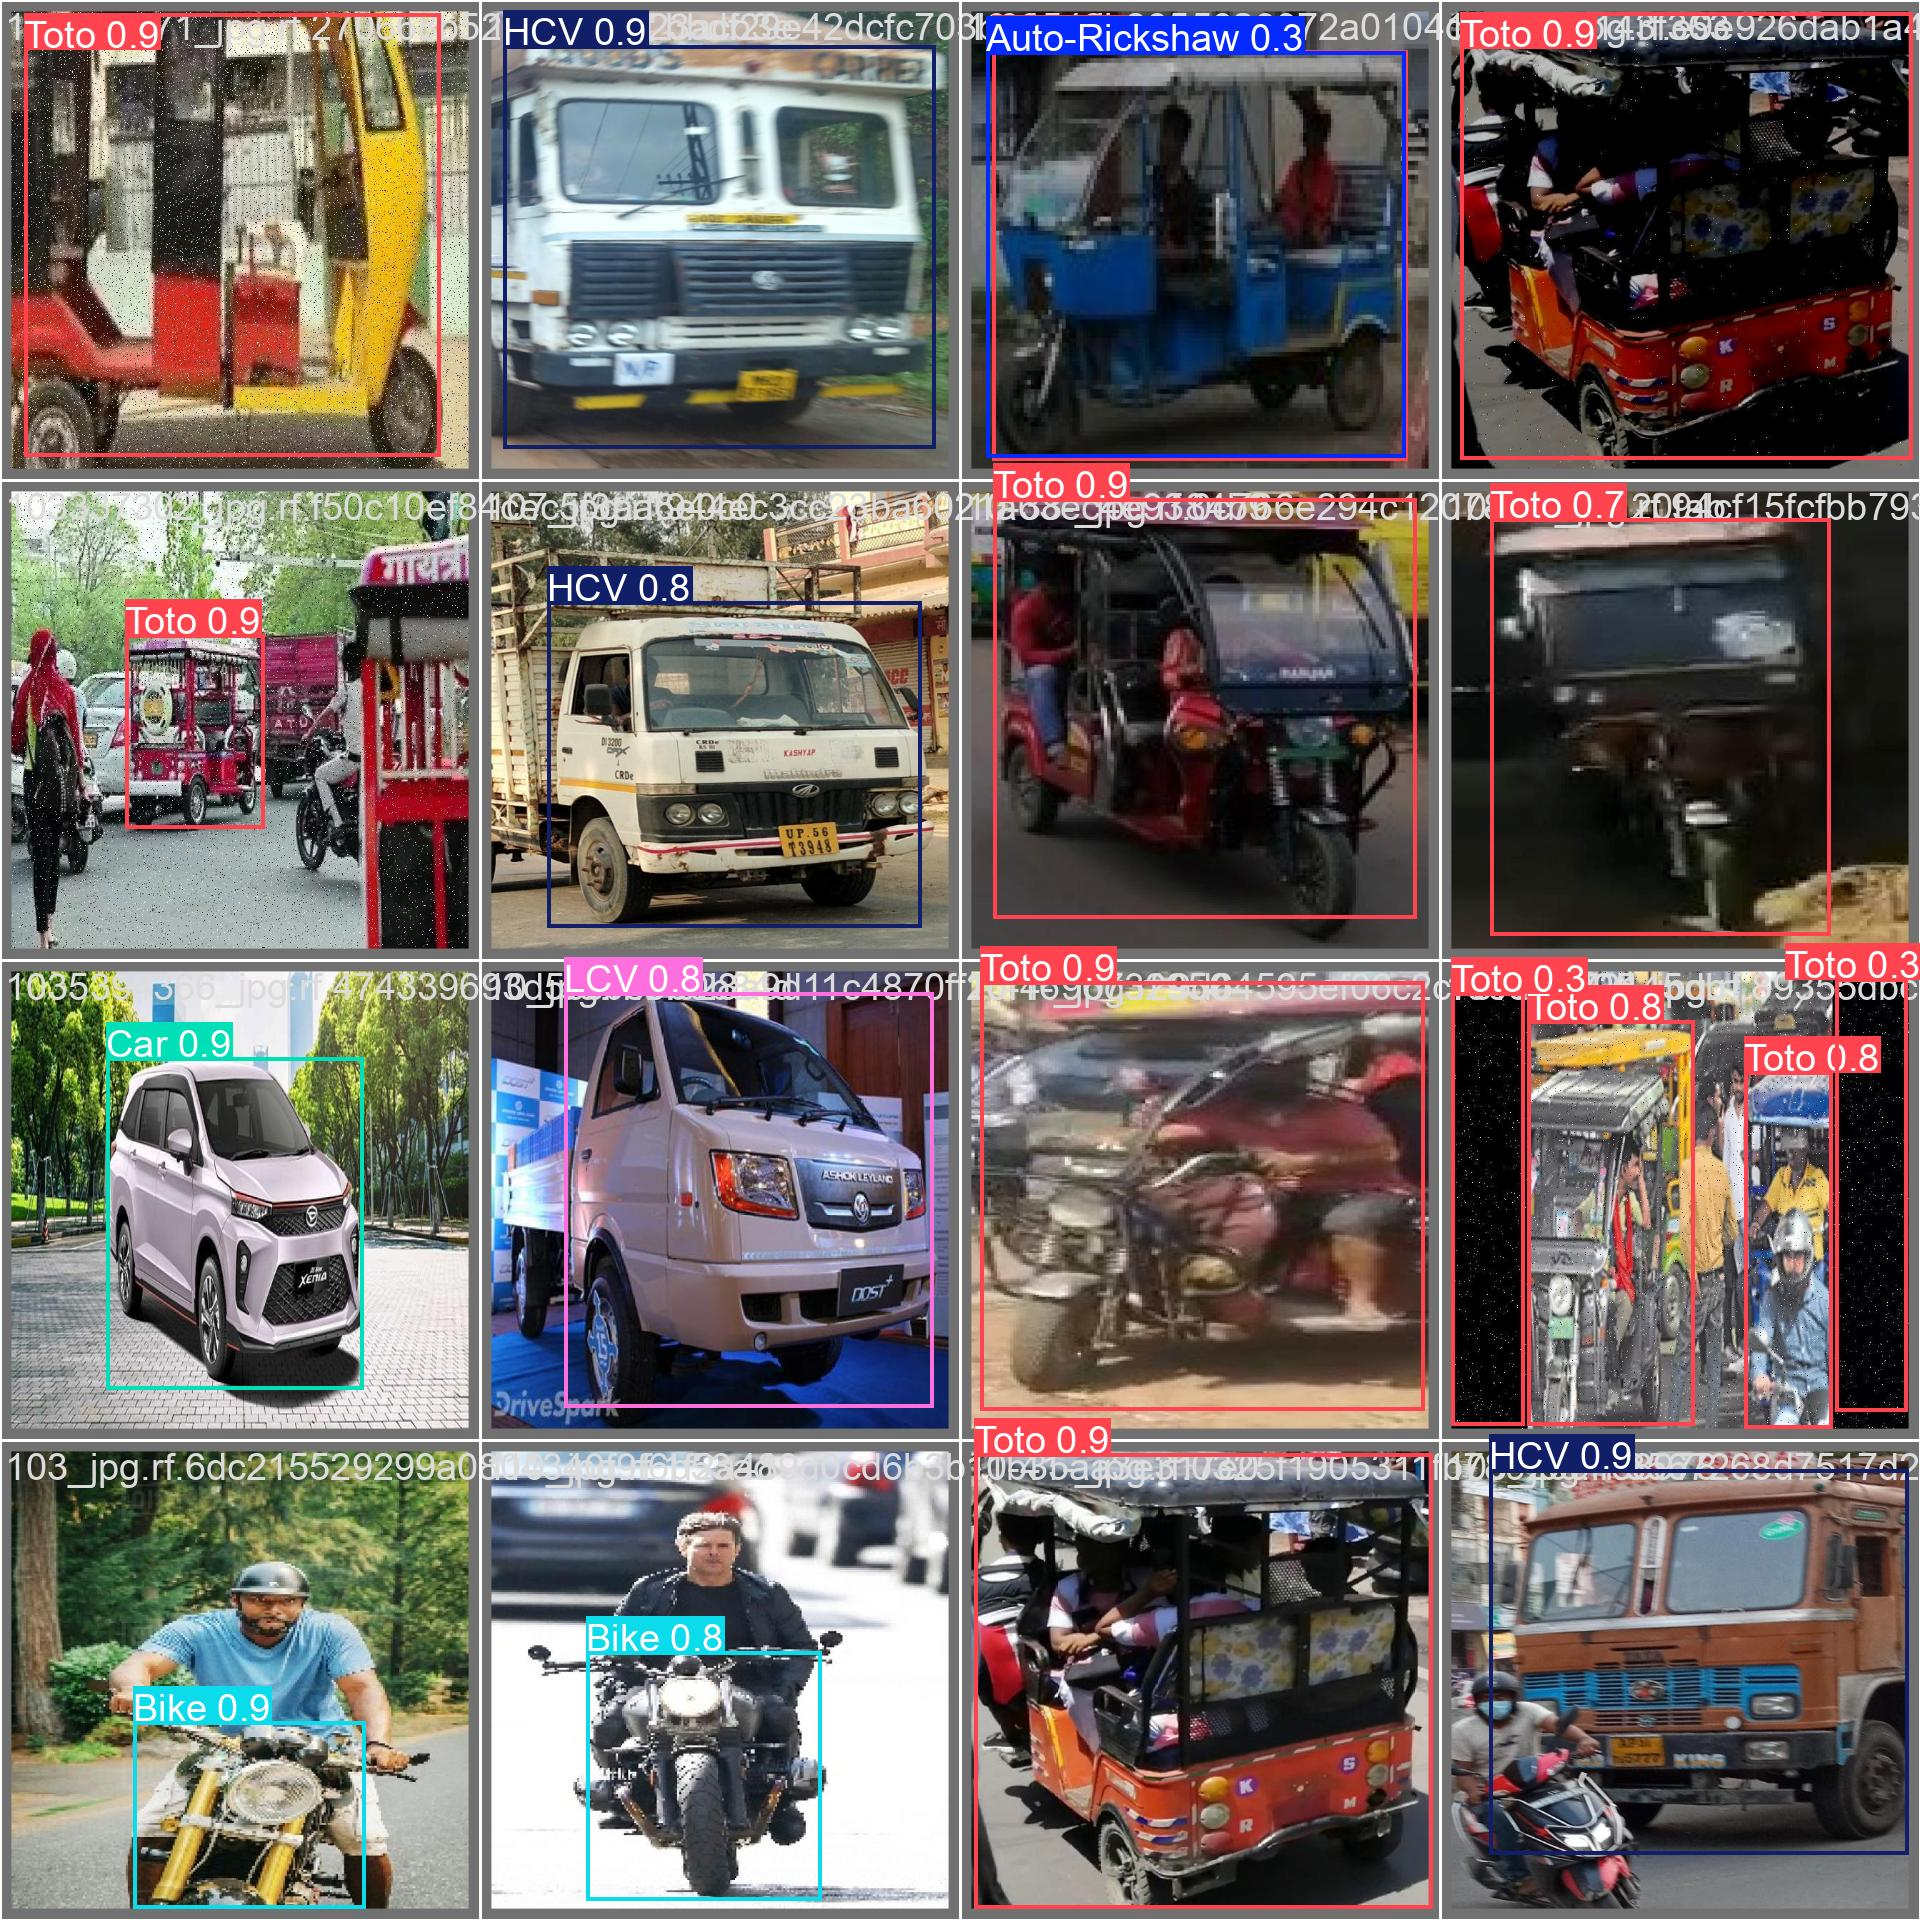

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/val_batch2_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Indian_Vehicle_Detection-6/valid/labels.cache... 952 images, 0 backgrounds, 0 corrupt: 100% 952/952 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 32, len(boxes) = 1422. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 60/60 [00:09<00:00,  6.09it/s]
                   all        952       1422      0.926      0.837      0.913      0.653
         Auto-Rickshaw        119        138      0.944      0.861      0.943      0.681
                  Bike        195        278      0.935       0.82      0.925      0.569
                   Bus        

In [ ]:
model = YOLO("/content/runs/detect/train3/weights/best.pt")

result = model()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

# Path to your YOLO model in Google Drive
model_path = '/content/drive/MyDrive/auto.pt'
# Load the model
model = YOLO(model_path)

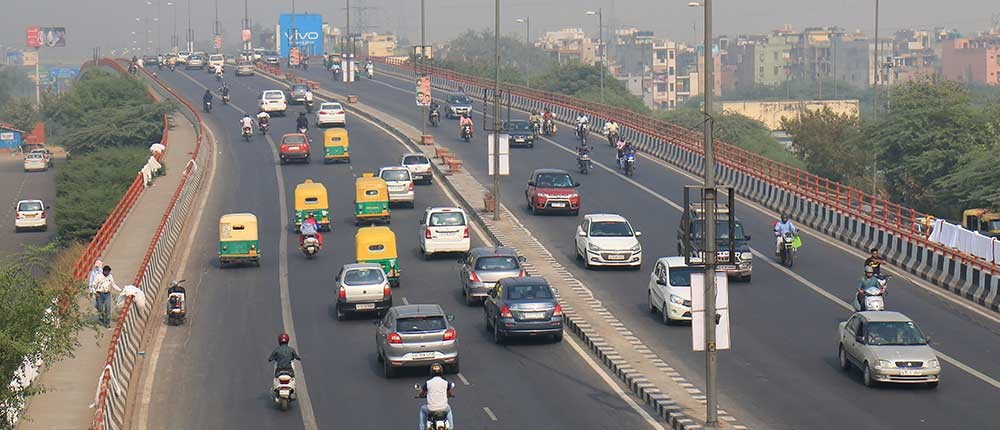

In [4]:
from PIL import Image
from IPython.display import display

# Path to your image in Google Drive
image_path = '/content/drive/MyDrive/1699330823589.jpeg'
# Load the image
image = Image.open(image_path)

# Display the image using IPython.display
display(image)

100%|██████████| 18.4M/18.4M [00:00<00:00, 464MB/s]



image 1/1 /content/drive/MyDrive/1699330823589.jpeg: 288x640 4 persons, 20 cars, 7 motorcycles, 2 buss, 4 trucks, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 640)

image 1/1 /content/drive/MyDrive/1699330823589.jpeg: 288x640 3 Autos, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


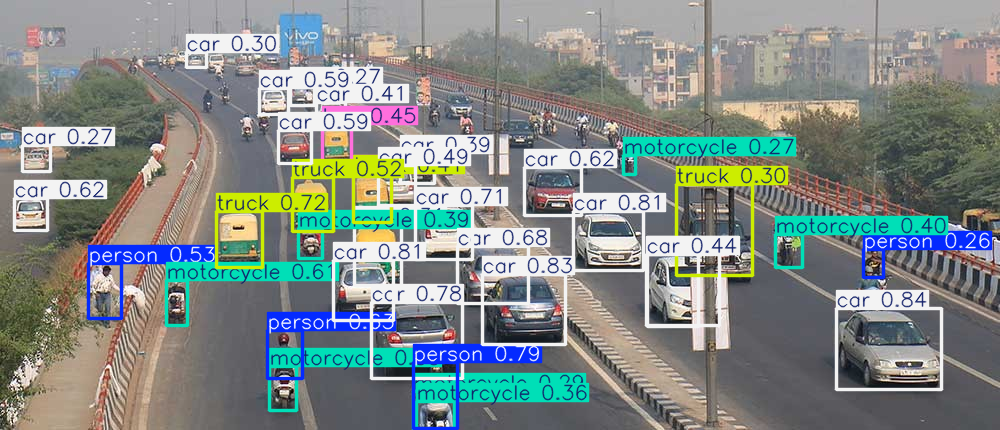

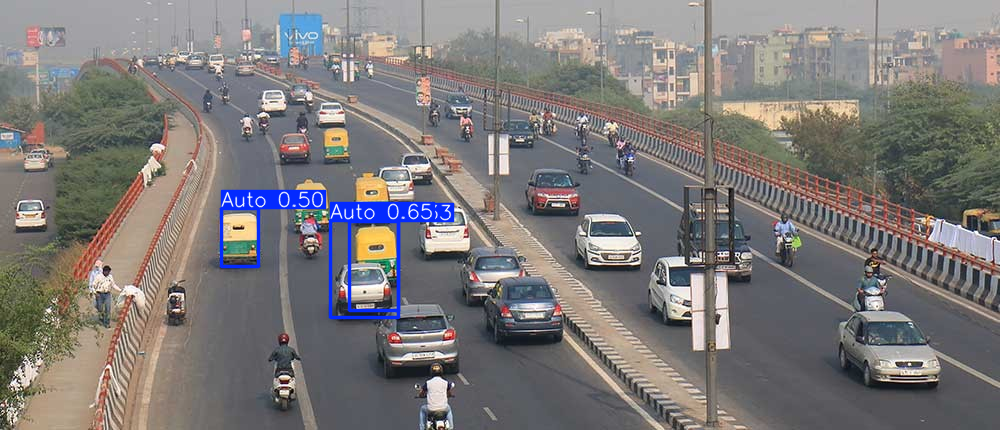

In [6]:
from ultralytics import YOLO

# Load both models
model_yolo = YOLO("yolo11s.pt")  # Pretrained YOLOv11s for all vehicles
model_auto = model  # Custom Auto Rickshaw model

image = "test.jpg"

# Run detection on both models
results_yolo = model_yolo(image_path)
results_auto = model_auto(image_path)

# Merge detections from both models
all_results = results_yolo + results_auto

# Display results
for result in all_results:
    result.show()



image 1/1 /content/drive/MyDrive/1699330823589.jpeg: 288x640 4 persons, 20 cars, 7 motorcycles, 2 buss, 4 trucks, 12.5ms
Speed: 2.5ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 640)

image 1/1 /content/drive/MyDrive/1699330823589.jpeg: 288x640 3 Autos, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)


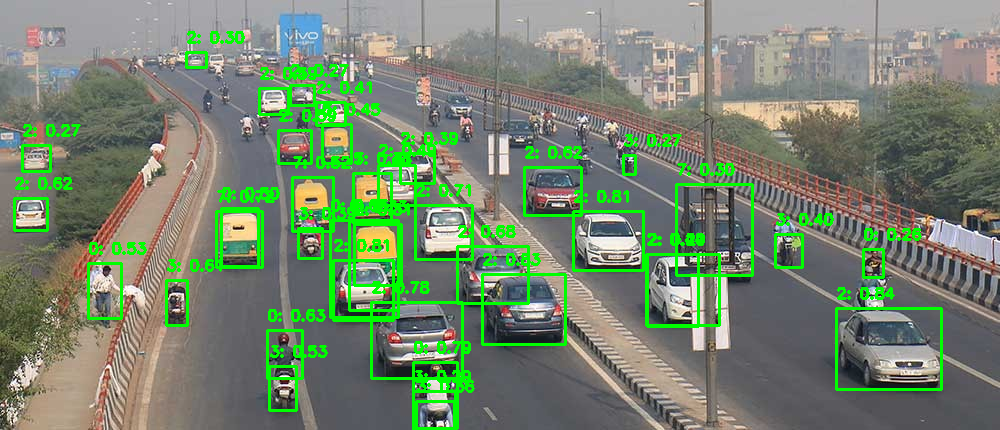

In [7]:
from ultralytics import YOLO
import cv2
import torch
# Import the cv2_imshow function from google.colab.patches
from google.colab.patches import cv2_imshow


model_yolo = YOLO("yolo11s.pt")
model_auto = model  # Trained Auto Rickshaw model


image_path = '/content/drive/MyDrive/1699330823589.jpeg'
image = cv2.imread(image_path)

results_yolo = model_yolo(image_path)
results_auto = model_auto(image_path)

# Combine results
all_detections = []
for result in results_yolo + results_auto:
    all_detections.extend(result.boxes.data.cpu().numpy())  # Convert to numpy for merging

# Draw combined detections
for box in all_detections:
    x1, y1, x2, y2, conf, cls = box  # Get coordinates, confidence, and class
    label = f"{int(cls)}: {conf:.2f}"
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save and show final detection result
cv2.imwrite("combined_result.jpg", image)
cv2_imshow(image)
